In [60]:
import numpy as np

basesizes = [8, 16, 32, 64, 128, 256, 512, 1024]

paths_basesize = [
    'outputs_done/foundation_basesize_8/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_basesize_16/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_basesize_32/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_basesize_64/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_basesize_128/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_basesize_256/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_basesize_512/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_depth_1-25/test-categorical-classification/dataset_plot_combined.npy'
]

depths = [1, 5, 9, 13, 17, 21, 25]

paths_depth = [
    'outputs_done/foundation_depth_1/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_depth_1-5/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_depth_1-9/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_depth_1-13/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_depth_1-17/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_depth_1-21/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_depth_1-25/test-categorical-classification/dataset_plot_combined.npy'
]

extra_names = [
    'no_categorical',
    'tabpfn_small',
    'tabpfn_big',
    'forest_small',
    'forest_big'
]

extra_paths = [
    'outputs_done/foundation_no_categorical/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_tabpfn_small/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_tabpfn_big/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_depth_1-25/test-categorical-classification/dataset_plot_combined.npy',
    'outputs_done/foundation_forest_big/test-categorical-classification/dataset_plot_combined.npy'
]




In [61]:
def get_data(path: str):

    data = np.load(path)

    f_mean = data[0, 7, 0]
    f_low = data[1, 7, 0]
    f_high = data[2, 7, 0]

    return f_mean, f_low, f_high

In [62]:
model_names = []
means = []
cb_lows = []
cb_highs = []

for path, basesize in zip(paths_basesize, basesizes):
    model_names.append(f'base size {basesize}')
    mean, cb_low, cb_high = get_data(path)
    means.append(mean)
    cb_lows.append(cb_low)
    cb_highs.append(cb_high)

for path, depth in zip(paths_depth, depths):
    model_names.append(f'depth {depth}')
    mean, cb_low, cb_high = get_data(path)
    means.append(mean)
    cb_lows.append(cb_low)
    cb_highs.append(cb_high)

for path, name in zip(extra_paths, extra_names):
    model_names.append(name)
    mean, cb_low, cb_high = get_data(path)
    means.append(mean)
    cb_lows.append(cb_low)
    cb_highs.append(cb_high)


             model      mean    cb_low   cb_high
0      base size 8  0.692548  0.593034  0.753696
1     base size 16  0.790673  0.764625  0.821639
2     base size 32  0.849224  0.826829  0.866641
3     base size 64  0.835241  0.813189  0.857014
4    base size 128  0.830739  0.762173  0.866659
5    base size 256  0.856173  0.834976  0.875238
6    base size 512  0.830576  0.810247  0.849123
7   base size 1024  0.851441  0.834116  0.873537
8          depth 1  0.471204  0.450290  0.492120
9          depth 5  0.773266  0.749379  0.796506
10         depth 9  0.833172  0.806203  0.854642
11        depth 13  0.801618  0.772337  0.831546
12        depth 17  0.817977  0.796728  0.837850
13        depth 21  0.805773  0.788179  0.822646
14        depth 25  0.851441  0.834116  0.873537
15  no_categorical  0.677344  0.652055  0.704899
16    tabpfn_small  0.784611  0.764562  0.805269
17      tabpfn_big  0.865328  0.846752  0.882465
18    forest_small  0.851441  0.834116  0.873537
19      forest_big  

<Axes: xlabel='model'>

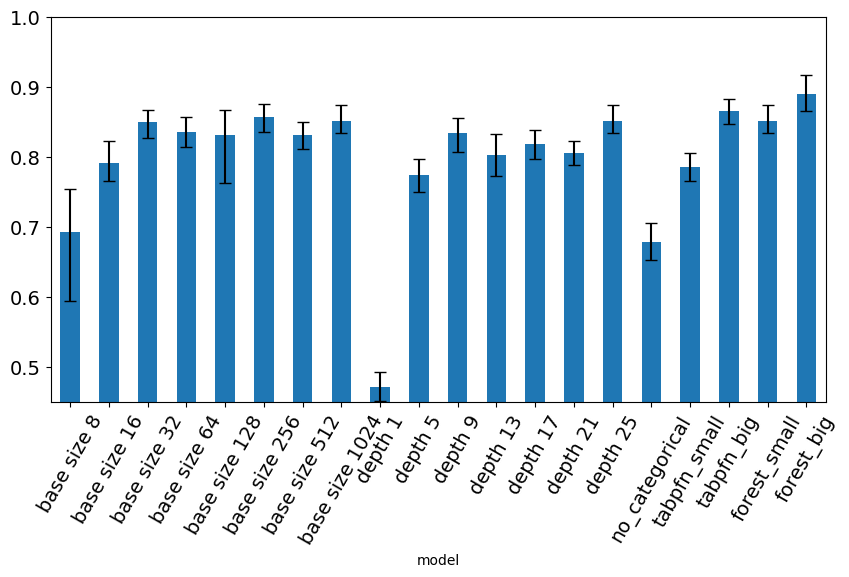

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'model': model_names, 'mean': means, 'cb_low': cb_lows, 'cb_high': cb_highs})

print(df)

df['cb_error_low'] = df['mean'] - df['cb_low']
df['cb_error_high'] = df['cb_high'] - df['mean']

errs = df[['cb_error_low', 'cb_error_high']].values.T
df.plot(x='model', y='mean', kind='bar', yerr=errs, capsize=4, rot=60, ylim=(0.45, 1.0), figsize=(10, 5), legend=False, fontsize=14)
